In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras.preprocessing.text import Tokenizer

/Applications/anaconda/envs/dlnd-tf-lab/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/bo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.datasets import fetch_20newsgroups

ng_train = fetch_20newsgroups(subset = 'train')# default shuffle = True, random_state = 42
ng_test = fetch_20newsgroups(subset = 'test')

texts_train = ng_train.data
texts_test = ng_test.data
labels_train = ng_train.target
labels_test = ng_test.target

target_names = ng_train.target_names
file_names = ng_train.filenames

In [4]:
print (len(texts_train),len(texts_test),len(labels_train),len(labels_test),len(target_names))

11314 7532 11314 7532 20


In [5]:
lens_train_raw = np.array([len(text.split()) for text in texts_train])
lens_test_raw = np.array([len(text.split()) for text in texts_test])
lens_raw = np.concatenate([lens_train_raw,lens_test_raw])

print (np.mean(lens_raw))
print (np.mean(lens_train_raw))
print (np.mean(lens_test_raw))

283.6560012734798
287.4701255082199
277.92671269251196


In [6]:
print (texts_train[0])
print (labels_train[0])
print (target_names[labels_train[0]])
print (file_names[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





7
rec.autos
/Users/bo/scikit_learn_data/20news_home/20news-bydate-train/rec.autos/102994


## Preprocess the data

### 1. Remove punctuation

In [7]:
# build a function to remove punctuation
def remove_punc(texts):
    punc = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~'
    new_texts = []
    for text in texts:
        for c in text:
            if c in punc:
                text = text.replace(c,' ')
        new_texts.append(text)
    return new_texts

In [8]:
# remove punctuation from original corpus
texts_train_np = remove_punc(texts_train)
texts_test_np = remove_punc(texts_test)

In [9]:
# print the first text without punc
print (texts_train_np[0])

From  lerxst wam umd edu  where's my thing 
Subject  WHAT car is this  
Nntp Posting Host  rac3 wam umd edu
Organization  University of Maryland  College Park
Lines  15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day  It was a 2 door sports car  looked to be from the late 60s 
early 70s  It was called a Bricklin  The doors were really small  In addition 
the front bumper was separate from the rest of the body  This is 
all I know  If anyone can tellme a model name  engine specs  years
of production  where this car is made  history  or whatever info you
have on this funky looking car  please e mail 

Thanks 
  IL
        brought to you by your neighborhood Lerxst     







In [10]:
with open("dataset.txt",'w') as f:
    f.truncate()
    f.writelines(texts_train_np)
    f.writelines(texts_test_np)

In [11]:
unique_words = set(w.lower() for w in open('dataset.txt').read().split())
len(unique_words)

179173

### 2. Remove stopwords

In [12]:
# build stop list
import os
import pandas as pd

stop_list = pd.read_csv('stoplist.csv')
stop_list = list(stop_list["'"])

print ("The list's length:",len(stop_list))
print ("The first 10 Stopwords:",stop_list[:10])

The list's length: 6236
The first 10 Stopwords: ['a', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards']


In [13]:
# build a function to remove stopwords from the original corpus
def remove_stopwords(texts,stop_list):
    texts_nswds = []
    for text in texts:
        word_list = text.split() # turn each text to a list of words
        new_text = []
        for word in word_list:
            if word not in stop_list:
                new_text.append(word)
        texts_nswds.append(new_text)
    return texts_nswds   

In [14]:
# remove stopwords from texts_train_1 and texts_test_1
import time
time0 = time.time()
texts_train_ns = remove_stopwords(texts_train_np,stop_list)
time1 = time.time() - time0
print ("time cost for removing stopwords from texts_train_ns:",time1)
time2 = time.time()
texts_test_ns = remove_stopwords(texts_test_np,stop_list)
time3 = time.time() - time2
print ("time cost for removing stopwords from texts_test_ns:",time3)

time cost for removing stopwords from texts_train_ns: 191.32467818260193
time cost for removing stopwords from texts_test_ns: 115.46167802810669


In [15]:
print (texts_train_ns[0])

['From', 'lerxst', 'wam', 'umd', 'Subject', 'WHAT', 'car', 'Nntp', 'Posting', 'Host', 'rac3', 'wam', 'umd', 'Organization', 'University', 'Maryland', 'College', 'Park', 'Lines', '15', 'I', 'wondering', 'enlighten', 'car', 'I', 'day', 'It', 'door', 'sports', 'car', 'looked', 'late', '60s', 'early', '70s', 'It', 'called', 'Bricklin', 'The', 'doors', 'small', 'In', 'addition', 'front', 'bumper', 'separate', 'rest', 'body', 'This', 'I', 'If', 'tellme', 'model', 'engine', 'specs', 'years', 'production', 'car', 'history', 'info', 'funky', 'car', 'mail', 'Thanks', 'IL', 'brought', 'neighborhood', 'Lerxst']


## According to the comparison of coverage below, between texts_train_ns and texts_train_ls, it's better to fit our classifier with texts_train_ns.

In [16]:
# bring texts_train_ns back to list of texts instead of lists
texts_train_ns_join = [" ".join(text) for text in texts_train_ns]

In [17]:
tokenizer = Tokenizer(num_words = 20000)
tokenizer.fit_on_texts(texts_train_ns_join)
word_index = tokenizer.word_index

In [22]:
def coverage(word_index,vocab_of_embedding):
    count = 0
    for word,idx in word_index.items():
        if idx > 20000:
            continue
        if word in vocab_of_embedding:
            count += 1
    return (count/20000)

#### Calculate how many of the top 20k words in texts_train_ns  are included in the pretrained glove 6B 100d word embeddings

In [18]:
# load pretrained word embeddings:glove.6B.100d.txt


filename_100d = 'glove.6B.100d.txt' ## this file 'glove.6B.100d.txt' is composed of lines with each line containning a word and its embedding.

## store words and their embeddings in separate lists, then turn embedding list to np array.

def loadGloVe(filename):
    vocab = []
    embd = []
    #with open (filename,'r') as f:
        #emb_size = len(f.readline().strip().split(' '))-1
    #vocab.append('unk') #load unknown words
    #embd.append([0]*emb_size)
    
    file = open(filename,'r')
    for line in file:
        row = line.strip().split(' ')
        vocab.append(row[0])
        embd.append(row[1:])
    print('Loaded GloVe!')
    file.close()
    return vocab,embd

vocab_100d,embd_100d = loadGloVe(filename_100d)

Loaded GloVe!


In [19]:
vocab_100d_size = len(vocab_100d)
embedding_100d_dim = len(embd_100d[0])
print (vocab_100d_size,embedding_100d_dim)

400000 100


In [23]:
cov_100d = coverage(word_index,vocab_100d)

In [24]:
print ("%.2f percent of the top 20,000 words in the trainset is covered by the embeddings."%(100*cov_100d))

86.81 percent of the top 20,000 words in the trainset is covered by the embeddings.


#### Calculate how many of the top 20k words in texts_train_ns  are included in the pretrained glove 840B 300d word embeddings

In [25]:
# load pretrained word embeddings:glove.6B.100d.txt


filename_300d = 'glove.840B.300d.txt' ## this file 'glove.6B.100d.txt' is composed of lines with each line containning a word and its embedding.

## store words and their embeddings in separate lists, then turn embedding list to np array.

def loadGloVe(filename):
    vocab = []
    embd = []
    #with open (filename,'r') as f:
        #emb_size = len(f.readline().strip().split(' '))-1
    #vocab.append('unk') #load unknown words
    #embd.append([0]*emb_size)
    
    file = open(filename,'r')
    for line in file:
        row = line.strip().split(' ')
        vocab.append(row[0])
        embd.append(row[1:])
    print('Loaded GloVe!')
    file.close()
    return vocab,embd

import time
time0 = time.time()
vocab,embd = loadGloVe(filename_300d)
time_cost = time.time()-time0
print (time_cost)

Loaded GloVe!
794.769031047821


In [27]:
vocab_size = len(vocab)
embedding_dim = len(embd[0])
print(vocab_size,embedding_dim)

2196017 300


In [28]:
cov_300d = coverage(word_index,vocab)

In [29]:
print ("%.2f percent of the top 20,000 words in the trainset is covered by glove.840B.300d embeddings."%(100*cov_300d))

87.77 percent of the top 20,000 words in the trainset is covered by glove.840B.300d embeddings.


### 3. Lemmatization

In [30]:
# build a func for lemmatization 
def lemmatize(text_list):
    lmtzer = WordNetLemmatizer()
    
    new_texts = [] # list of list of words
     
    for list in text_list: # text is a list of words
        new_text = '' # list of words
        for word in list:
            ld_wrd = lmtzer.lemmatize(word)
            new_text += ld_wrd
            new_text += ' '
        new_texts.append(new_text)
        
    return new_texts

In [31]:
# lemmatization of the original corpus
time0 = time.time()
texts_train_ls = lemmatize(texts_train_ns)
time1 = time.time() - time0
print ("time cost for lemmatizing texts_train_ns:",round(time1,2),"s")
time2 = time.time()
texts_test_ls = lemmatize(texts_test_ns)
time3 = time.time() - time2
print ("time cost for lemmatizing texts_test_ns:",round(time3,2),"s")

time cost for lemmatizing texts_train_ns: 13.74 s
time cost for lemmatizing texts_test_ns: 6.53 s


In [32]:
print (texts_train_ls[0]) 

From lerxst wam umd Subject WHAT car Nntp Posting Host rac3 wam umd Organization University Maryland College Park Lines 15 I wondering enlighten car I day It door sport car looked late 60 early 70 It called Bricklin The door small In addition front bumper separate rest body This I If tellme model engine spec year production car history info funky car mail Thanks IL brought neighborhood Lerxst 


#### Calculate how many of the top 20k words in texts_train_ls  are included in the pretrained word embeddings

In [33]:
tokenizer_ls = Tokenizer(num_words = 20000)
tokenizer_ls.fit_on_texts(texts_train_ls)

In [34]:
word_index_ls = tokenizer_ls.word_index

In [35]:
# calculation for 100d
cov_ls_100d = coverage(word_index_ls,vocab_100d)
print ("%.2f percent of the top 20,000 words in the trainset is covered by the embeddings."%(100*cov_ls_100d))

85.36 percent of the top 20,000 words in the trainset is covered by the embeddings.


In [36]:
# calculation for 300d
cov_ls_300d = coverage(word_index_ls,vocab)
print ("%.2f percent of the top 20,000 words in the trainset is covered by the embeddings."%(100*cov_ls_300d))

86.42 percent of the top 20,000 words in the trainset is covered by the embeddings.


#### Calculate how many of the top 20k words in texts_train_ls  are included in the pretrained glove.840B.300d word embeddings

## Visualization

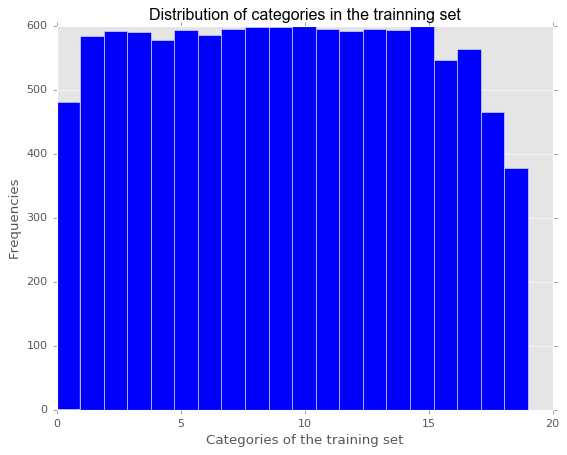

In [71]:
plt.style.use("ggplot")

plt.hist(labels_train,bins = 20,color = 'blue')
plt.xlabel('Categories of the training set',fontsize = 12)
plt.ylabel('Frequencies',fontsize = 12)
plt.title("Distribution of categories in the trainning set")

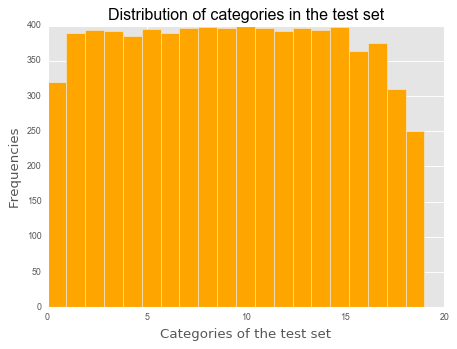

In [62]:
plt.style.use("ggplot")

plt.hist(labels_test,bins = 20,color = 'orange')
plt.xlabel('Categories of the test set',fontsize = 12)
plt.ylabel('Frequencies',fontsize = 12)
plt.title("Distribution of categories in the test set")

13 35201 178.7682797410591


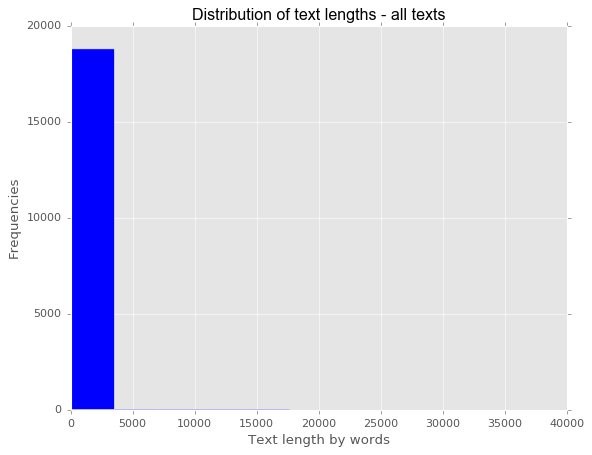

In [73]:
lens_train = np.array([len(text.split()) for text in texts_train_ls])
lens_test = np.array([len(text.split()) for text in texts_test_ls])
lens = np.concatenate([lens_train,lens_test])

print (min(lens),max(lens),np.mean(lens))

plt.style.use("ggplot")

plt.hist(lens,color = 'b')
plt.xlabel('Text length by words',fontsize = 12)
plt.ylabel('Frequencies',fontsize = 12)
plt.title("Distribution of text lengths - all texts")

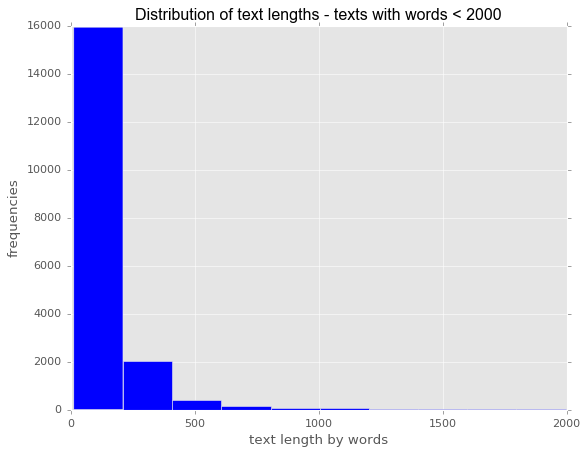

In [74]:
sub_lens = np.array([x for x in lens if x < 2000 ])

plt.style.use("ggplot")

plt.hist(sub_lens,color = 'b')
plt.xlabel('text length by words',fontsize = 12)
plt.ylabel('frequencies',fontsize = 12)
plt.title("Distribution of text lengths - texts with words < 2000")

In [85]:
# bring texts_test_ns back to list of texts instead of lists.
texts_test_ns_join = [" ".join(text) for text in texts_test_ns]
# save the preprocessed data.
with open("Preprocessed data for CNN - update.txt",'wb') as f:
    pickle.dump(texts_train_ns_join,f)
    pickle.dump(texts_test_ns_join,f)
    pickle.dump(labels_train,f)
    pickle.dump(labels_test,f)